In [29]:
from time import sleep, time
from math import sin, cos, tan, pi
import pandas as pd 
import math
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv('imu_data.csv')
len(data)

2000

In [31]:
data.head()

,t,Ax,Ay,Az,Gx,Gy,Gz
0,0.000000,0.098145,0.026367,0.816162,-0.679389,1.076336,-1.152672
1,0.000197,0.101562,0.030762,0.815186,-3.007634,1.854962,0.114504
2,0.019354,0.106201,0.028809,0.838867,-6.396947,2.618321,0.572519
3,0.037792,0.104004,0.042969,0.843750,-12.022901,3.877863,1.351145
4,0.056218,0.079590,0.013672,0.841797,-6.931298,3.267176,-0.099237


In [32]:
T = data.t[0:1000]

In [33]:
T

0       0.000000
1       0.000197
2       0.019354
3       0.037792
4       0.056218
         ...    
995    18.370768
996    18.389218
997    18.407672
998    18.426121
999    18.444616
Name: t, Length: 1000, dtype: float64

In [45]:

# Iterations and sleep time
N = 1000
# Filter coefficient
alpha = 0.4

#Gyro Bias
bx = 0.0
by = 0.0
bz = 0.0

# Complimentary filter estimates
phi_hat = 0.0
theta_hat = 0.0

# Measured sampling time
dt = 0.0

#For angles 
phi_hat = [0]
theta_hat = [0]
shi_hat = [1]

gtx = [0]
gty = [0]
gtz = [1]

atx = [0]
aty = [0]
atz = [1]


In [46]:
for i in range(1,N):
    # Get estimated angles from raw accelerometer data
    ax = data.Ax[i]
    ay = data.Ay[i]
    az = data.Az[i]
    phi_hat_acc = math.atan2(ax, math.sqrt(ax ** 2.0 + az ** 2.0))
    theta_hat_acc = math.atan2(ay, math.sqrt(ay ** 2.0 + az ** 2.0))
    shi_hat_acc = math.atan2(az, math.sqrt(ay ** 2.0 + ax ** 2.0))
    
    # Get raw gyro data and subtract biases
    p = data.Gx[i] * math.pi / (180.0)
    q = data.Gy[i] * math.pi / (180.0)
    r = data.Gz[i] * math.pi / (180.0)
    p -= bx
    q -= by
    r -= bz
    
    # Calculate Euler angle derivatives 
    phi_dot = p + sin(phi_hat[i-1]) * tan(theta_hat[i-1]) * q + cos(phi_hat[i-1]) * tan(theta_hat[i-1]) * r
    theta_dot = cos(phi_hat[i-1]) * q - sin(phi_hat[i-1]) * r
    shi_dot = q*(sin(phi_hat[i-1])/cos(theta_hat[i-1])) + r*(cos(phi_hat[i-1])/cos(theta_hat[i-1]))
    
    #Store values from onlygyroscope
    gtx.append(phi_hat[i-1] + dt * phi_dot)
    gty.append(theta_hat[i-1] + dt * phi_dot)
    gtz.append(shi_hat[i-1] + dt * phi_dot)
    
    
    #Store Values only from accelerometer
    atx.append(phi_hat_acc)
    aty.append(theta_hat_acc)
    atz.append(shi_hat_acc)
    
    # Update complimentary filter
    phi_hat.append((1 - alpha) * (phi_hat[i-1] + dt * phi_dot) + alpha * phi_hat_acc)
    theta_hat.append((1 - alpha) * (theta_hat[i-1] + dt * theta_dot) + alpha * theta_hat_acc)
    shi_hat.append((1 - alpha) * (shi_hat[i-1] + dt * shi_dot) + alpha * shi_hat_acc)
    
    # Display results
    #print("Phi: " + str(round(phi_hat[i] * 180.0 / pi, 1)) + " | Theta: " + str(round(theta_hat[i] * 180.0 / pi, 1)))

Text(0.5, 1.0, 'X-orientation')

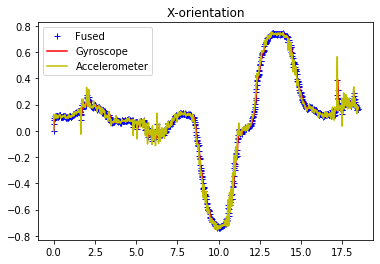

In [55]:
fig, ax = plt.subplots()
ax.plot(T,phi_hat, '+b', label='Fused')
ax.plot(T,gtx, 'r', label='Gyroscope')
ax.plot(T,atx, 'y', label='Accelerometer')
leg = ax.legend();
plt.title('X-orientation')

Text(0.5, 1.0, 'Y-orientation')

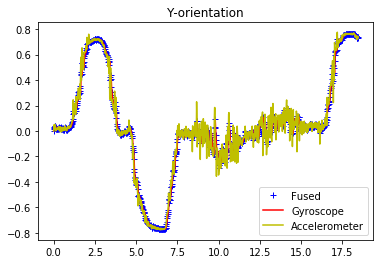

In [56]:
fig, ax = plt.subplots()
ax.plot(T,theta_hat, '+b', label='Fused')
ax.plot(T,gty, 'r', label='Gyroscope')
ax.plot(T,aty, 'y', label='Accelerometer')
leg = ax.legend();
plt.title('Y-orientation')

Text(0.5, 1.0, 'Z-orientation')

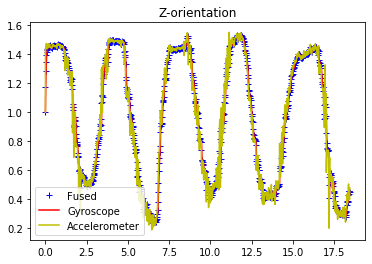

In [57]:
fig, ax = plt.subplots()
ax.plot(T,shi_hat, '+b', label='Fused')
ax.plot(T,gtz, 'r', label='Gyroscope')
ax.plot(T,atz, 'y', label='Accelerometer')
leg = ax.legend();
plt.title('Z-orientation')